In [1]:
import functions
import datasets

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

In [3]:
clf_list = [DecisionTreeClassifier(), 
            LogisticRegression(solver='lbfgs', max_iter=np.inf), 
            functions.kernelLR_model(),
           SVC(probability=True, gamma='auto', C=10), 
            GaussianNB(),
           KNeighborsClassifier()]

clf_ind = 2

print("Classifier Used:",clf_list[clf_ind])
clf = clf_list[clf_ind]

Classifier Used: <functions.kernelLR_model object at 0x000002518E3952E8>


In [4]:
all_datasets = [datasets.harrypotter(), datasets.womenbias(), datasets.germanloan(clf)]
data_ind = 2

In [5]:
data = all_datasets[data_ind]


X_train, y_train, X_trust, y_trust, true_bugs = data.get_data()
X_train.shape, y_train.shape, X_trust.shape, y_trust.shape, true_bugs.shape

Reading dataset...
(190, 24) (810, 24)
Creating datasets A, B and C...
Training Model on dataset C...
Accuracy of model on dataset C: 1.0
Creating trusted labels for dataset A...
Number of label changes made in Dataset A to make it trusted: 14 

Number of bugs in training set: 126.0


((340, 23), (340,), (40, 23), (40,), (340,))

In [7]:
clf.fit(X_train, y_train)

In [8]:
data.plot_model(X_train, y_train, clf=clf, X_trust=X_trust, y_trust=y_trust, title="Classifier")

In [9]:
y_trust_pred = clf.predict(X_trust)
trust_wrong = np.zeros(y_trust.shape)
trust_wrong[y_trust!=y_trust_pred] = 1
trust_acc = 1 - np.count_nonzero(y_trust-y_trust_pred)/y_trust.shape[0]
print("Trust Accuracy:",trust_acc)

Trust Accuracy: 0.825


In [10]:
y_train_pred = clf.predict(X_train)
wrong = np.zeros(y_train.shape)
wrong[y_train!=y_train_pred] = 1
acc = 1 - np.count_nonzero(y_train-y_train_pred)/y_train.shape[0]
print("Train Accuracy:",acc)

data.plot_model(X_train, y_train, bugs=wrong, clf=clf, X_trust=X_trust, y_trust=y_trust, title='Misclassified points shown')

Train Accuracy: 1.0


In [11]:
all_influences = functions.calculate_influences_on_trust_remove(clf, X_train, y_train, X_trust, y_trust, all=False)
all_influences.shape

(7, 340)

In [12]:
n = 10
top_n = True
data.plot_influences(X_train, y_train, all_influences, n, top_n, X_trust, y_trust)

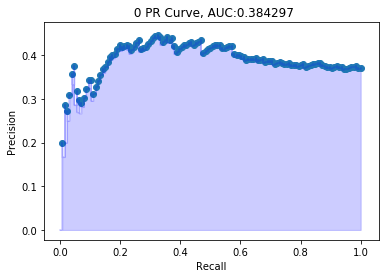

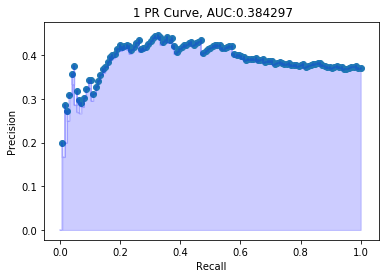

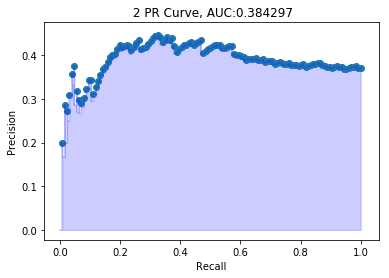

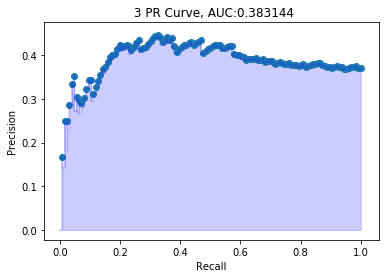

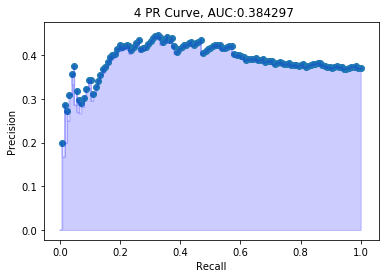

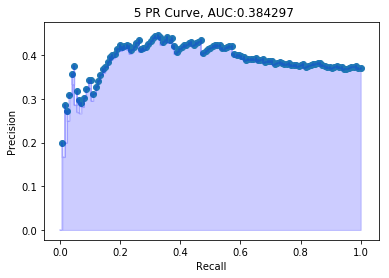

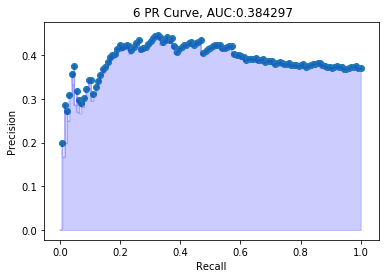

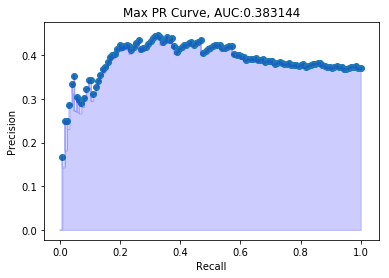

In [14]:
pr = True
functions.plot_pr_curves(all_influences, true_bugs, PR=pr, title=None)

# Digits

In [82]:
from sklearn.datasets import load_digits
digits = load_digits()

In [83]:
data = digits['data']
labels = digits['target']
data.shape, labels.shape

((1797, 64), (1797,))

In [157]:
num_trusted_per_label = 4
num_train_per_label = 160
per_label = num_trusted_per_label + num_train_per_label

labels_considered = [1,7]

X_trust = np.zeros((len(labels_considered)*num_trusted_per_label,data.shape[1]))
y_trust = np.zeros((len(labels_considered)*num_trusted_per_label,))
X_train = np.zeros((len(labels_considered)*num_train_per_label,data.shape[1]))
y_train_clean = np.zeros((len(labels_considered)*num_train_per_label,))


for i in range(len(labels_considered)):
    true_label = labels_considered[i]
    A = data[labels==true_label]
    ind = np.random.randint(A.shape[0], size=per_label)

    X_trust[num_trusted_per_label*i:num_trusted_per_label*(i+1),:] = A[ind[:num_trusted_per_label], :]
    y_trust[num_trusted_per_label*i:num_trusted_per_label*(i+1)] = true_label
    
    X_train[num_train_per_label*i:num_train_per_label*(i+1),:] = A[ind[num_trusted_per_label:], :]
    y_train_clean[num_train_per_label*i:num_train_per_label*(i+1)] = true_label
    
    
num_bugs = 50

# Introducing bugs
# take first num_bugs 7's and label them as 1's

y_train = np.copy(y_train_clean)
wrong_labels = 1*np.ones((num_train_per_label)) 
wrong_labels[num_bugs:] = 7
true_bugs = np.zeros((X_train.shape[0],))
y_train[y_train_clean==7] = wrong_labels
true_bugs[y_train==1] = 1
true_bugs[y_train_clean==1] = 0

y_train[y_train==7] = -1
y_trust[y_trust==7] = -1


In [158]:
X_train.shape, y_train.shape, X_trust.shape, y_trust.shape

((320, 64), (320,), (8, 64), (8,))

In [186]:
s = np.arange(X_trust.shape[0])
np.random.shuffle(s)
X_trust = X_trust[s]
y_trust = y_trust[s]

s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
y_train = y_train[s]
true_bugs = true_bugs[s]

In [160]:
import matplotlib.pyplot as plt 
def show_digit(data, label=None):
    plt.figure()
    plt.gray() 
    plt.matshow(data.reshape((8,8))) 
    plt.title(label)
    plt.show() 

In [196]:
clf_list = [DecisionTreeClassifier(), 
            LogisticRegression(solver='lbfgs', max_iter=np.inf), 
            functions.kernelLR_model(),
           SVC(probability=True, gamma='auto', C=10), 
            GaussianNB(),
           KNeighborsClassifier()]

clf_ind = 1

print("Classifier Used:",clf_list[clf_ind])
clf = clf_list[clf_ind]

Classifier Used: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=inf, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)


In [197]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=inf, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [198]:
data.plot_model(X_train, y_train, clf=clf, X_trust=X_trust, y_trust=y_trust, title="Classifier")

AttributeError: 'numpy.ndarray' object has no attribute 'plot_model'

Trust Accuracy: 0.75


<Figure size 432x288 with 0 Axes>

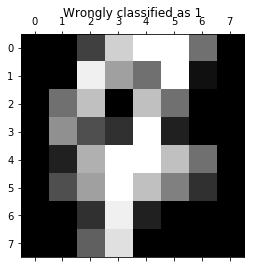

<Figure size 432x288 with 0 Axes>

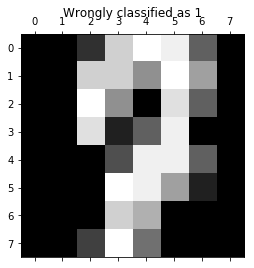

In [199]:
y_trust_pred = clf.predict(X_trust)
trust_wrong = np.zeros(y_trust.shape)
trust_wrong[y_trust!=y_trust_pred] = 1
trust_acc = 1 - np.count_nonzero(y_trust-y_trust_pred)/y_trust.shape[0]
print("Trust Accuracy:",trust_acc)

for i in range(trust_wrong.shape[0]):
    if trust_wrong[i]==1:
        show_digit(X_trust[i], label="Wrongly classified as %d"%y_trust_pred[i])

In [200]:
y_train_pred = clf.predict(X_train)
wrong = np.zeros(y_train.shape)
wrong[y_train!=y_train_pred] = 1
acc = 1 - np.count_nonzero(y_train-y_train_pred)/y_train.shape[0]
print("Train Accuracy:",acc)

data.plot_model(X_train, y_train, bugs=wrong, clf=clf, X_trust=X_trust, y_trust=y_trust, title='Misclassified points shown')

Train Accuracy: 0.89375


AttributeError: 'numpy.ndarray' object has no attribute 'plot_model'

In [201]:
all_influences = functions.calculate_influences_on_trust_remove(clf, X_train, y_train, X_trust, y_trust, all=False)
all_influences.shape

(2, 320)

In [202]:
n = 10
top_n = True
data.plot_influences(X_train, y_train, all_influences, n, top_n, X_trust, y_trust)

AttributeError: 'numpy.ndarray' object has no attribute 'plot_influences'

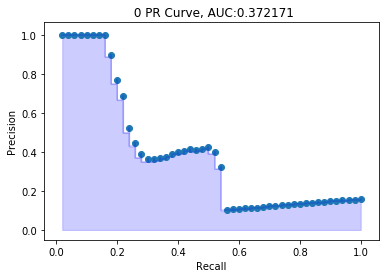

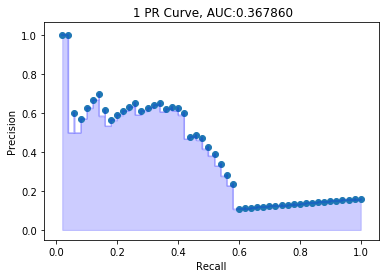

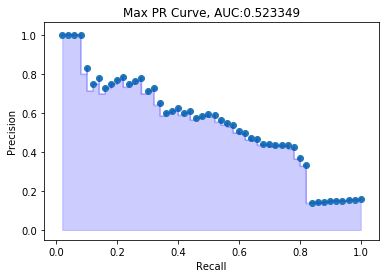

In [203]:
pr = True
functions.plot_pr_curves(all_influences, true_bugs, PR=pr, title=None)